In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def draw_bars(data: pd.DataFrame, column: str, target_column: str) -> None:
    
    counts = pd.DataFrame(data[[column, target_column]].groupby(column).value_counts(normalize=True) * 100).unstack().fillna(0)
    
    bar_position = None
    
    for i in counts.columns:
        
        bar = plt.bar(np.arange(len(counts[i].index.values)), counts[i], bottom=bar_position, width = 0.75, label = i[1])      #Create bar for each lable
        
        txt_to_bars = [f"{i.get_height():.2f} %" if i.get_height() > 5 else '' for i in bar ]    #str labels % for each bar
        
        plt.bar_label(bar, txt_to_bars, label_type='center')                                            #add % labels
        
        if bar_position is None:
            bar_position = counts[i]
        else:
            bar_position += counts[i]
     
    plt.xlabel(column)
    plt.xticks(np.arange(len(counts.index.values)), [i for i in counts.index.values])
    plt.legend(title=target_column, loc='upper right')
    

# example: 
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

In [42]:
data = pd.read_csv('data.csv')
#data

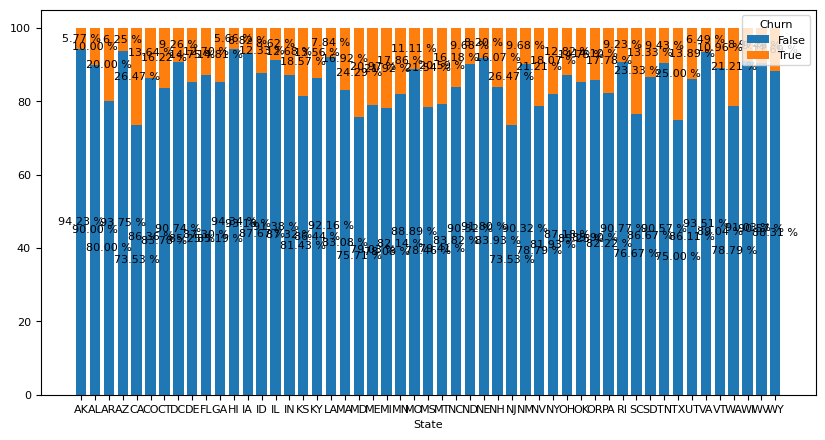

In [44]:
plt.figure(figsize=(10, 5))
plt.rcParams.update({ 'font.size': 8 })

#draw_bars(data, 'Customer service calls', 'Churn')
#draw_bars(data, 'Churn', 'Customer service calls')
draw_bars(data, 'State', 'Churn')